# Face Detection with OpenCV YuNet

This notebook detects faces in an image using the YuNet model from OpenCV Zoo.

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Configuration
IMAGE_PATH = r"E:\\8_Life\\2025_08_14_France\\DSC00242.JPG"
MODEL_PATH = r"01_Model\\face_detection_yunet_2023mar.onnx"

# Check if paths exist
if not Path(IMAGE_PATH).exists():
    print(f"Error: Image not found at {IMAGE_PATH}")

if not Path(MODEL_PATH).exists():
    print(f"Error: Model not found at {MODEL_PATH}")
    print("Please download the model to the 01_Model directory.")

Detected 1 faces.


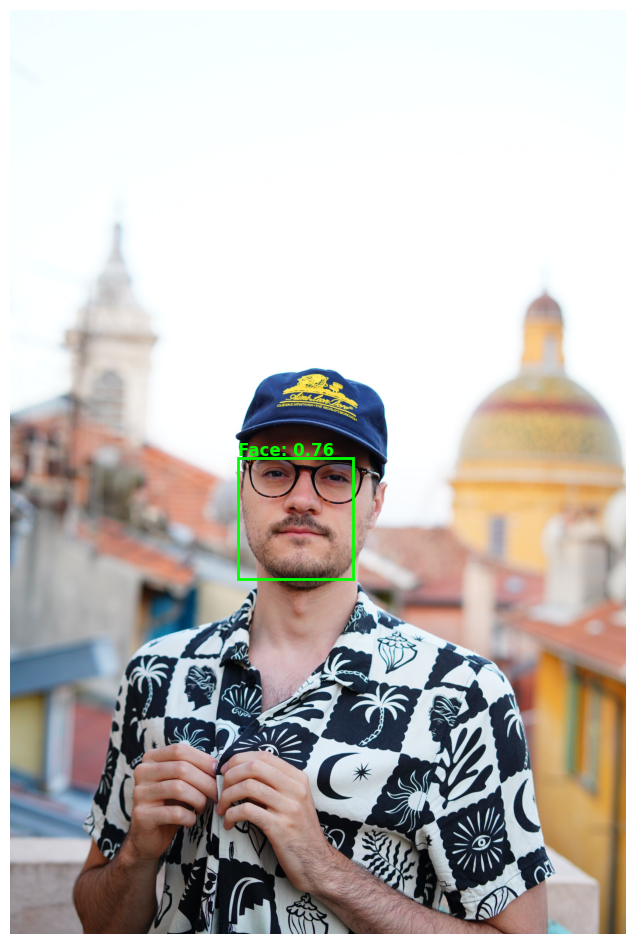

In [20]:
def detect_and_visualize(image_path, model_path):
    # 1. Load Image
    img = cv2.imread(image_path)
    if img is None:
        print("Failed to load image.")
        return

    # 2. Rotate Image 90 degrees (Clockwise)
    # Creating a copy to ensure memory layout is compatible if needed, though rotate handles it.
    # ROTATE_90_CLOCKWISE fits the likely need for a sideways photo.
    # img_rotated = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    img_rotated = img
    
    # Get dimensions
    h, w, _ = img_rotated.shape

    # 3. Initialize YuNet Face Detector
    # Input image size must be specified
    face_detector = cv2.FaceDetectorYN.create(
        model=model_path,
        config="",
        input_size=(w, h),
        score_threshold=0.7,  # Confidence threshold
        nms_threshold=0.3,
        top_k=1000
    )

    # 4. Detect Faces
    # FaceDetectorYN expects BGR image (OpenCV default)
    # Results: faces is a numpy array of shape [n, 15] or None
    # Format: x1, y1, w, h, x_re, y_re, x_le, y_le, x_nt, y_nt, x_rcm, y_rcm, x_lcm, y_lcm, score
    retval, faces = face_detector.detect(img_rotated)

    # 5. Visualize with Matplotlib
    # Convert BGR to RGB for matplotlib
    img_rgb = cv2.cvtColor(img_rotated, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(12, 12))
    plt.imshow(img_rgb)
    ax = plt.gca()

    if faces is not None:
        print(f"Detected {faces.shape[0]} faces.")
        for face in faces:
            # Extract bounding box
            x, y, w_box, h_box = face[0:4]
            confidence = face[-1]
            
            # Create a Rectangle patch
            # linewidth=2, edgecolor='g', facecolor='none'
            rect = plt.Rectangle((x, y), w_box, h_box, linewidth=2, edgecolor='lime', facecolor='none')
            ax.add_patch(rect)
            
            # Add label
            plt.text(x, y - 10, f"Face: {confidence:.2f}", color='lime', fontsize=12, fontweight='bold')
    else:
        print("No faces detected.")

    plt.axis('off')
    plt.show()

# Run the detection
detect_and_visualize(IMAGE_PATH, MODEL_PATH)